# Задача 12

Предсказать сорт винограда из которого сделано вино, используя [результаты химических анализов](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) ([описание](http://archive.ics.uci.edu/ml/datasets/Wine) данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k. 

In [1]:
%matplotlib inline

import io

import requests

import scipy as sp
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
raw_dataset = requests.get(dataset_url)
assert raw_dataset.status_code == 200

In [3]:
dataset = sp.genfromtxt(
    io.StringIO(raw_dataset.text), 
    delimiter=',', 
    dtype=[('class', sp.int8), ('features', sp.float64, (13,))]
)

X = [ item[1] for item in dataset ]
y = [ item[0] for item in dataset ]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

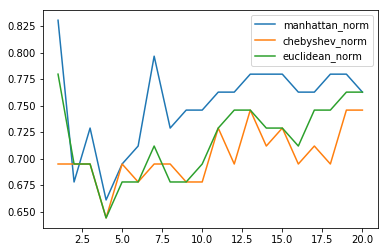

In [4]:
ks = range(1, 21)

means = {}

for metric in ('euclidean', 'manhattan', 'chebyshev'):
    cur_means = []
    
    for k in ks:
        classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        
        cur_means.append(sp.mean(prediction == y_test))
        
    means[metric] = cur_means
        
for metric, cur_means in means.items():
    plt.plot(ks, cur_means, label=metric + '_norm')

plt.legend(loc='upper right')
plt.show()

Сравнивались следующие метрики:
- сумма модулей (manhattan)
- евклидова норма (euclidean)
- максимум модулей (chebyshev)
Сравнивались количество ближайших соседей от 1 до 20 (верхняя граница 20 в силу малого количества данных).

## Вывод
Cумма модулей в качестве метркии и количество ближайших соседей от 7 до 20 оказалось удачным выбором.
